<a href="https://colab.research.google.com/github/alexc6h6/Regression-Model/blob/master/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls '/content/drive/My Drive/bike_sharing'

sampleSubmission_20.csv  sampleSubmission.csv  test.csv  train.csv


In [0]:
train = pd.read_csv('/content/drive/My Drive/bike_sharing/train.csv')
test = pd.read_csv('/content/drive/My Drive/bike_sharing/test.csv')

In [0]:
data = pd.concat([train, test], axis = 0, sort = False)

In [0]:
data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.dayofweek
data['hour'] = data['datetime'].dt.hour

data.drop(columns = 'datetime', inplace = True)

In [0]:
cols_cat = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']

for col in cols_cat:
  data[col] = data[col].astype('object')

In [15]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   holiday     17379 non-null  object 
 2   workingday  17379 non-null  object 
 3   weather     17379 non-null  object 
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       10886 non-null  float64
 11  year        17379 non-null  object 
 12  month       17379 non-null  object 
 13  day         17379 non-null  object 
 14  hour        17379 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 2.1+ MB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,5,4


In [0]:
cols_num = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

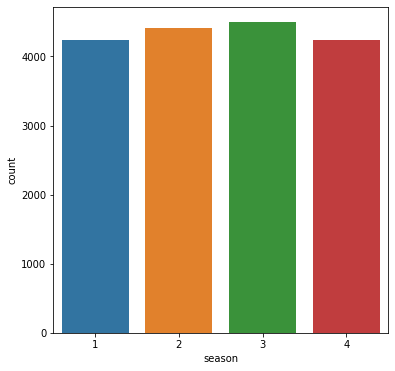

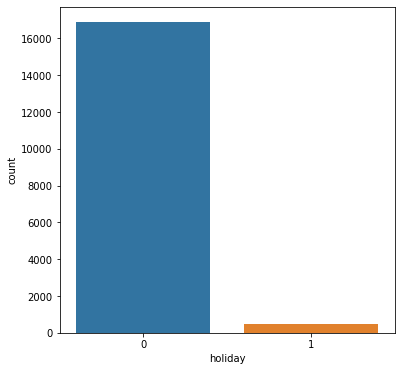

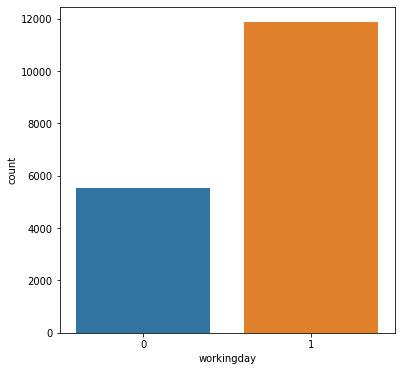

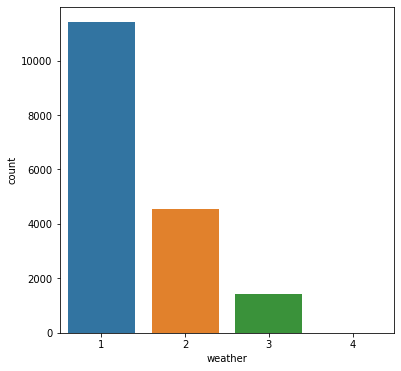

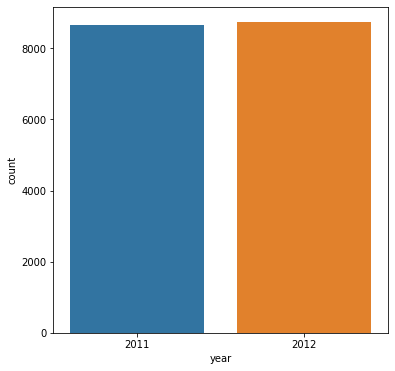

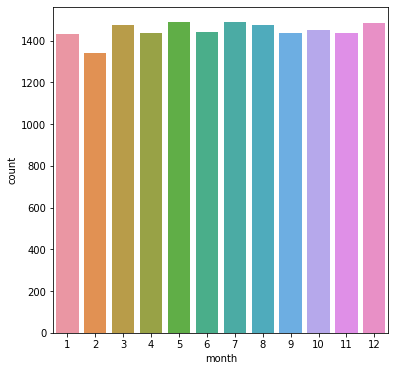

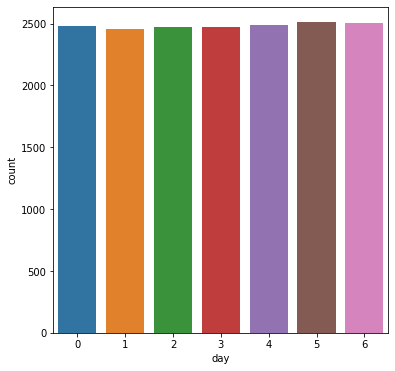

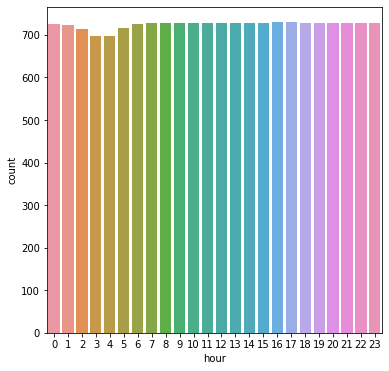

In [17]:
def cat_feature(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    sns.countplot(x = col, data = data)
    plt.show()

cat_feature(data, cols_cat)

In [0]:
data['windspeed'] = np.sqrt(data['windspeed'])


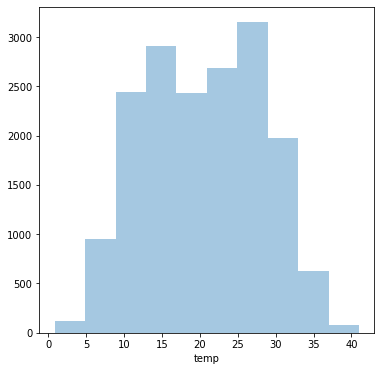

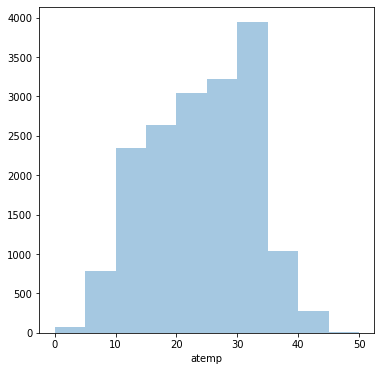

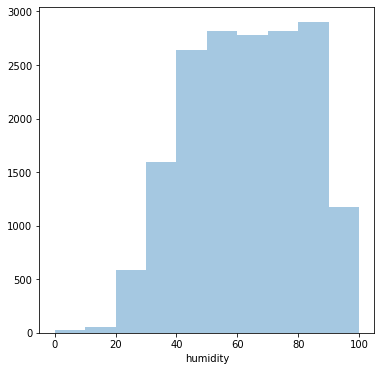

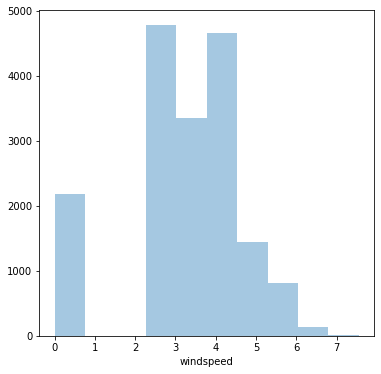

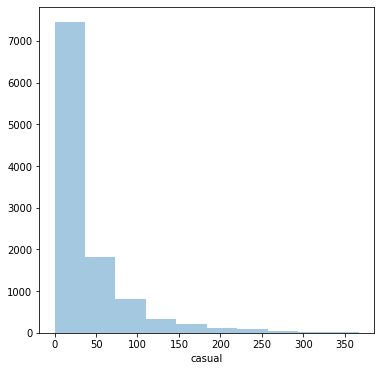

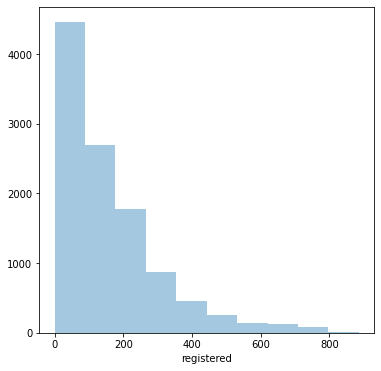

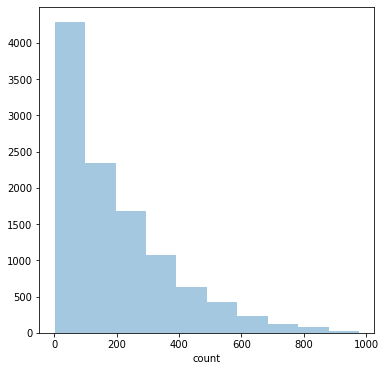

In [19]:
def num_feature(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    sns.distplot(data[col], bins = 10, kde = False)
    plt.show()

num_feature(data, cols_num)

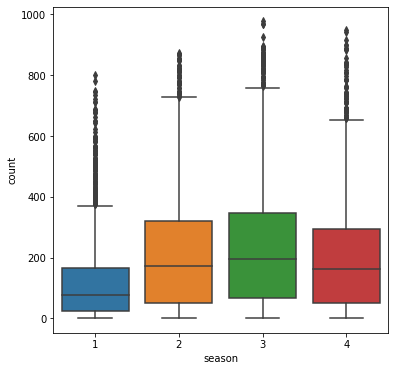

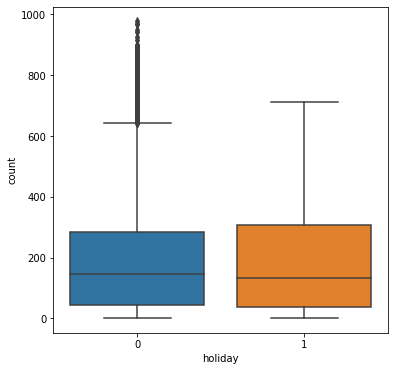

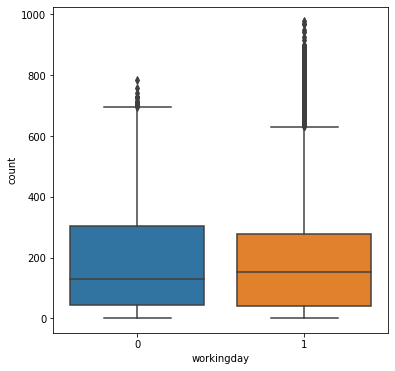

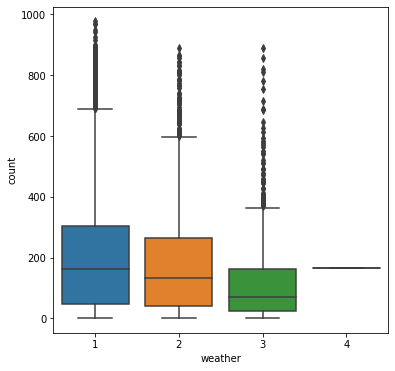

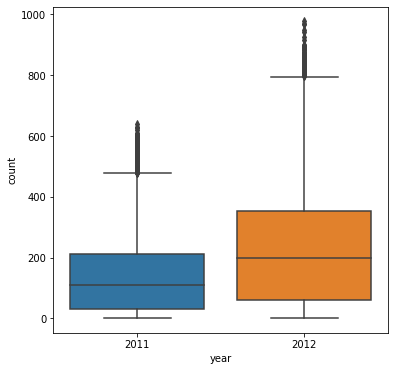

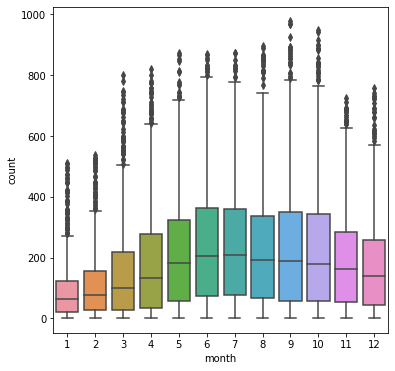

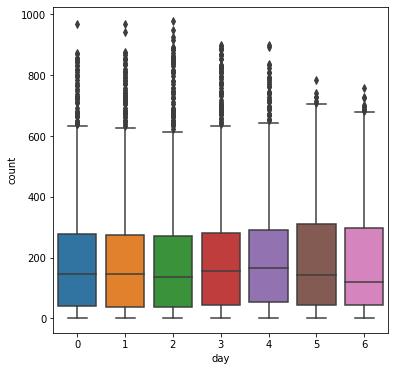

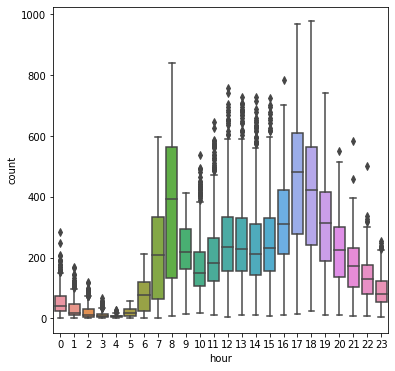

In [20]:
def rela_cat_label(data, cols, label):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    sns.boxplot(x = col, y = label, data = data)
    plt.show()

rela_cat_label(data, cols_cat, data['count'])

<Figure size 432x432 with 0 Axes>

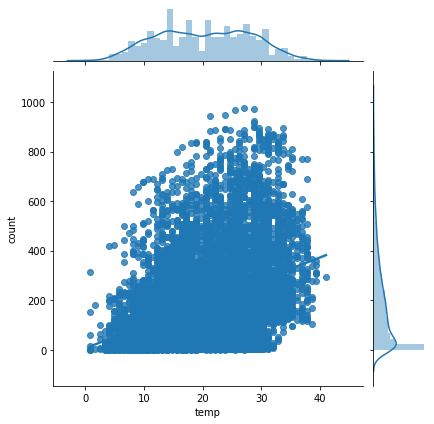

<Figure size 432x432 with 0 Axes>

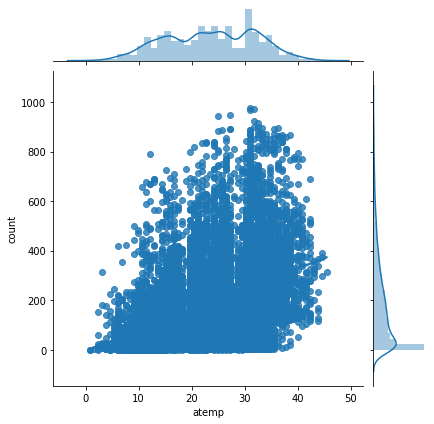

<Figure size 432x432 with 0 Axes>

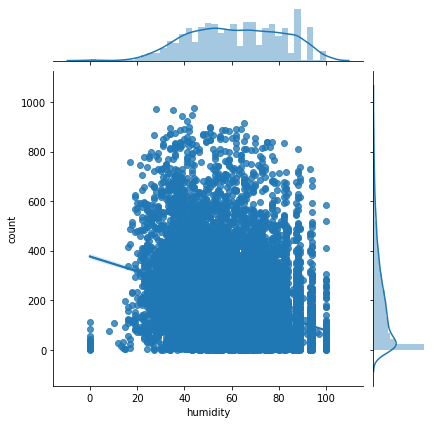

<Figure size 432x432 with 0 Axes>

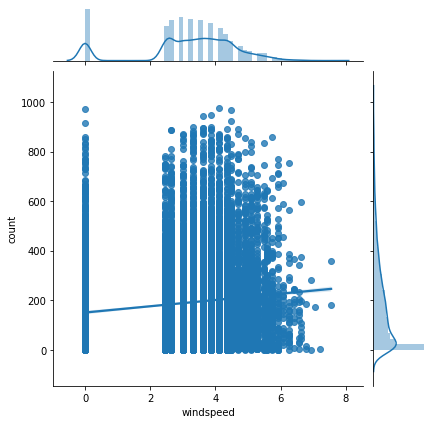

<Figure size 432x432 with 0 Axes>

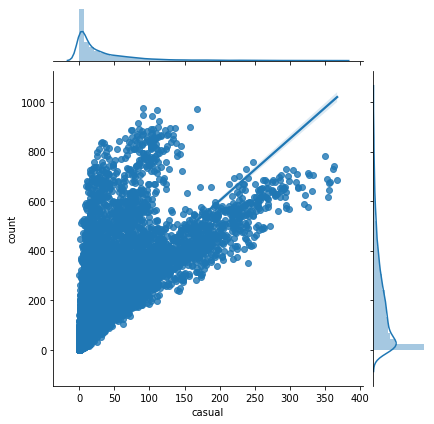

<Figure size 432x432 with 0 Axes>

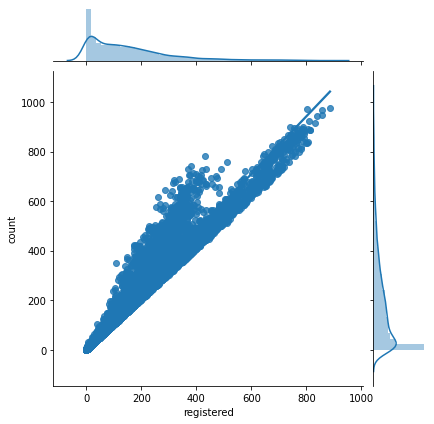

<Figure size 432x432 with 0 Axes>

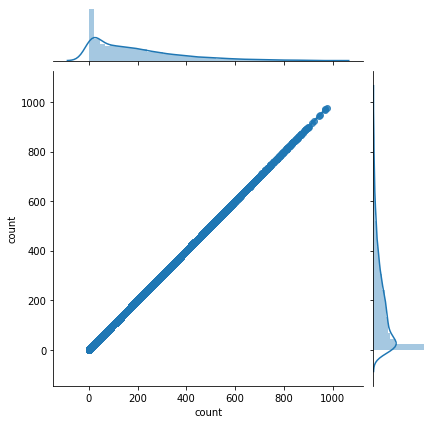

In [21]:
def rela_num_label(data, cols, label):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    sns.jointplot(x = col, y = label, data = data, kind = 'reg', )
    plt.show()

rela_num_label(data, cols_num, data['count'])

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols_cat:
  data[col] = le.fit_transform(data[col]).astype('object')

data = pd.get_dummies(data)

In [23]:
train = data[:10886]
test = data[10886:]

label = train[['casual', 'registered', 'count']]

train.drop(columns = ['casual', 'registered', 'count'], inplace = True)
test.drop(columns = ['casual', 'registered', 'count'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
print(train.shape)
print(label.shape)

(10886, 61)
(10886, 3)


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, label, test_size = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.utils import plot_model

Using TensorFlow backend.


In [33]:
model = Sequential()

units = 256
r = 0.1
dropout = 0.25

model.add(Dense(units = 512, input_shape = (61,), kernel_regularizer=regularizers.l2(r)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

for i in range(0, 8):
  model.add(Dense(units = units, kernel_regularizer=regularizers.l2(r)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

model.add(Dense(units =3, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               31744     
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
activation_11 (Activation)   (None, 256)              

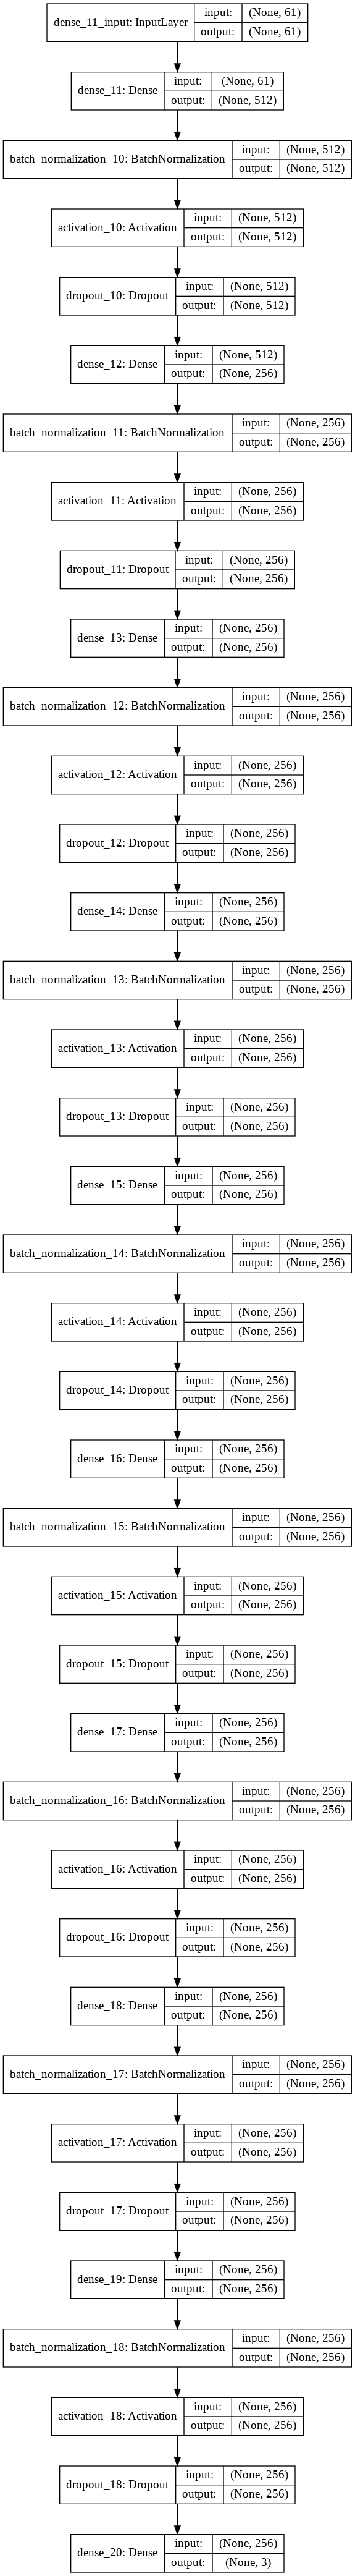

In [34]:
plot_model(model, show_shapes = True)

In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience =5, verbose = 1, min_lt = 0, factor = 0.033)


In [36]:
batch = 128
epochs = 100

train_history = model.fit(x_train, y_train,
                          batch_size = batch,
                          epochs = epochs,
                          verbose = 1,
                          callbacks = [reduce_lr],
                          validation_data = [x_val, y_val])

Train on 8708 samples, validate on 2178 samples
Epoch 1/100
8708/8708 [==============================] - 4s 488us/step - loss: 38602.9025 - mse: 38377.1484 - mae: 124.8067 - val_loss: 25296.4700 - val_mse: 25068.8105 - val_mae: 104.4126
Epoch 2/100
8708/8708 [==============================] - 2s 188us/step - loss: 32831.1759 - mse: 32603.0801 - mae: 115.5388 - val_loss: 17435.2168 - val_mse: 17206.8867 - val_mae: 92.9295
Epoch 3/100
8708/8708 [==============================] - 2s 187us/step - loss: 26870.9915 - mse: 26642.4727 - mae: 105.1263 - val_loss: 12368.1987 - val_mse: 12139.1875 - val_mae: 77.8181
Epoch 4/100
8708/8708 [==============================] - 2s 188us/step - loss: 20603.5785 - mse: 20372.7852 - mae: 93.1015 - val_loss: 9989.5261 - val_mse: 9757.6631 - val_mae: 68.7875
Epoch 5/100
8708/8708 [==============================] - 2s 187us/step - loss: 14553.2038 - mse: 14318.4346 - mae: 78.8909 - val_loss: 8523.9280 - val_mse: 8287.8760 - val_mae: 63.0597
Epoch 6/100
8708/

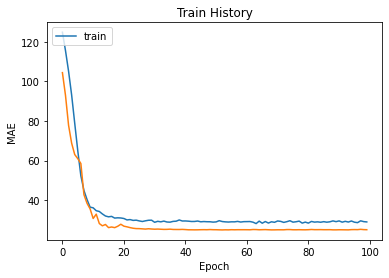

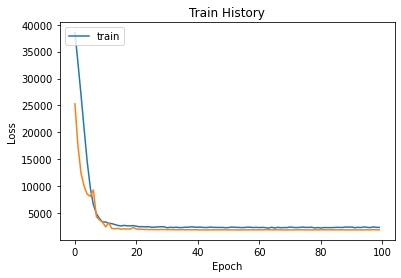

In [37]:
def show_train_history_mae(train_history):
    plt.plot(train_history.history['mae'])
    plt.plot(train_history.history['val_mae'])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend(["train"], loc="upper left")
    plt.show()

def show_train_history_loss(train_history):
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()

show_train_history_mae(train_history)    
show_train_history_loss(train_history)